<a href="https://colab.research.google.com/github/kkuang116/project_voting/blob/main/ML_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Summary**

**Data**

In [2]:
# ONLY RUN IF NEEDED (should be one time)
! pip3 install mapclassify
#! pip3 install geopandas

In [3]:
# maping related packages
import geopandas as gpd
import mapclassify as mp
from mpl_toolkits.axes_grid1 import make_axes_locatable

# general packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
! git clone https://github.com/vnewsome/project_voting

Cloning into 'project_voting'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 137 (delta 36), reused 21 (delta 21), pack-reused 94
Receiving objects: 100% (137/137), 31.74 MiB | 19.24 MiB/s, done.
Resolving deltas: 100% (66/66), done.


In [20]:
# From the VA Dept of Emergency Management, get the shapefiles: https://vgin.vdem.virginia.gov/datasets/777890ecdb634d18a02eec604db522c6/about
# From that archive, I uploaded the following files to Colab:
# VirginiaCounty_ClippedToShoreline.cpg
# VirginiaCounty_ClippedToShoreline.dbf
# VirginiaCounty_ClippedToShoreline.prj
# VirginiaCounty_ClippedToShoreline.shp
# VirginiaCounty_ClippedToShoreline.shp.xml
# VirginiaCounty_ClippedToShoreline.shx

In [21]:
# importing data for mapping **CHANGE GDF FILE LOCATION SPECIFIC TO YOUR DIRECTORY**
gdf = gpd.read_file('/content/VirginiaCounty_ClippedToShoreline.shx') # Load Virginia shapefile for maps
cdf = pd.read_csv('/content/project_voting/data/county_adjacencies.csv') # Load county adjacency data and population data

# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS'])
mapdf = gdf.merge(cdf,left_on='FIPS_left',right_on='FIPS')  # merge county population and adjacency data into df
del gdf, cdf

ERROR:fiona._env:Error in fread() reading object of size 13575360 at offset 100 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 53276 at offset 13575460 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 51516 at offset 13628736 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 63608 at offset 13680252 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 185768 at offset 13743860 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 53800 at offset 13929628 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 116984 at offset 13983428 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 77504 at offset 14100412 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 55608 at offset 14177916 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 100952 at offset 14233524 from .shp file
ERROR:fiona._env:Error in fre

In [7]:
# importing voting data, may need to add more county data here!
votingdf = pd.read_csv('/content/project_voting/data/voting_VA.csv') # Load historical voting data

# get listed columns/variables from the file and rename them, and drop the first row
# looking at population, sex, race, education, and median household income
list1 = ['YEAR','STATE','COUNTY','QSEE001','QSEE002','QSEE026','QSQE002','QSQE003','QSQE004','QSQE005','QSQE006','QSQE007','QSQE008','QUSE002','QUSE017','QUSE018','QUSE019','QUSE020','QUSE021','QUSE022','QUSE023','QUSE024','QUSE025','QU1E001']
df1 = pd.read_csv('/content/project_voting/data/county_data/0002_ds191_20125_county_E.csv',usecols=list1,encoding = "ISO-8859-1",low_memory=False) # 2008-2012 demographic data by area
df1 = df1.rename({'YEAR':'year','STATE':'state','COUNTY':'county','QSEE001':'population','QSEE002':'male pop','QSEE026':'female pop','QSQE002':'white','QSQE003':'black','QSQE004':'native american','QSQE005':'asian','QSQE006':'pacific islander','QSQE007':'other','QSQE008':'two or more','QUSE002':'no school','QUSE017':'high school diploma','QUSE018':'GED equivalent','QUSE019':'<1 year college','QUSE020':'>1 year college','QUSE021':'associates','QUSE022':'bachelors','QUSE023':'masters','QUSE024':'professional','QUSE025':'doctorate','QU1E001':'median household income'}, axis='columns')
df1 = df1.iloc[1: , :]

list2 = ['YEAR','STATE','COUNTY','AF2AE001','AF2AE002','AF2AE026','AF2ME002','AF2ME003','AF2ME004','AF2ME005','AF2ME006','AF2ME007','AF2ME008','AF4OE002','AF4OE017','AF4OE018','AF4OE019','AF4OE020','AF4OE021','AF4OE022','AF4OE023','AF4OE024','AF4OE025','AF49E001']
df2 = pd.read_csv('/content/project_voting/data/county_data/0002_ds225_20165_county_E.csv',usecols=list2,encoding = "ISO-8859-1",low_memory=False) # 2012-2016 demographic data by area
df2 = df2.rename({'YEAR':'year','STATE':'state','COUNTY':'county','AF2AE001':'population','AF2AE002':'male pop','AF2AE026':'female pop','AF2ME002':'white','AF2ME003':'black','AF2ME004':'native american','AF2ME005':'asian','AF2ME006':'pacific islander','AF2ME007':'other','AF2ME008':'two or more','AF4OE002':'no school','AF4OE017':'high school diploma','AF4OE018':'GED equivalent','AF4OE019':'<1 year college','AF4OE020':'>1 year college','AF4OE021':'associates','AF4OE022':'bachelors','AF4OE023':'masters','AF4OE024':'professional','AF4OE025':'doctorate','AF49E001':'median household income'}, axis='columns')
df2 = df2.iloc[1: , :]

list3 = ['YEAR','STATE','COUNTY','AMPKE001','AMPKE002','AMPKE026','AMPWE002','AMPWE003','AMPWE004','AMPWE005','AMPWE006','AMPWE007','AMPWE008','AMRZE002','AMRZE017','AMRZE018','AMRZE019','AMRZE020','AMRZE021','AMRZE022','AMRZE023','AMRZE024','AMRZE025','AMR8E001']
df3 = pd.read_csv('/content/project_voting/data/county_data/0002_ds249_20205_county_E.csv',usecols=list3,encoding = "ISO-8859-1",low_memory=False) # 2016-2020 demographic data by area
df3 = df3.rename({'YEAR':'year','STATE':'state','COUNTY':'county','AMPKE001':'population','AMPKE002':'male pop','AMPKE026':'female pop','AMPWE002':'white','AMPWE003':'black','AMPWE004':'native american','AMPWE005':'asian','AMPWE006':'pacific islander','AMPWE007':'other','AMPWE008':'two or more','AMRZE002':'no school','AMRZE017':'high school diploma','AMRZE018':'GED equivalent','AMRZE019':'<1 year college','AMRZE020':'>1 year college','AMRZE021':'associates','AMRZE022':'bachelors','AMRZE023':'masters','AMRZE024':'professional','AMRZE025':'doctorate','AMR8E001':'median household income'}, axis='columns')
df3 = df3.iloc[1: , :]

# combines data from 3 files into one dataframe
frames = [df1,df2,df3]
popchardf = pd.concat(frames)
del df1, df2, df3

In [8]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    display(popchardf)

,year,state,county,population,male pop,female pop,white,black,native american,asian,pacific islander,other,two or more,no school,high school diploma,GED equivalent,<1 year college,>1 year college,associates,bachelors,masters,professional,doctorate,median household income
1,2008-2012,Alabama,Autauga County,54590,26538,28052,43084,9880,169,439,0,212,806,636,9686,2188,2410,5332,2667,5085,1878,415,251,53773
2,2008-2012,Alabama,Baldwin County,183226,89270,93956,158259,17016,1038,1347,4,2645,2917,736,30682,5993,8459,21668,10370,23840,7880,2124,1463,50706
3,2008-2012,Alabama,Barbour County,27469,14749,12720,13448,12645,25,212,0,570,569,466,5095,1225,956,2564,1372,1613,839,224,81,31889
4,2008-2012,Alabama,Bibb County,22769,12154,10615,17459,4953,80,25,0,9,243,337,5694,763,675,2327,961,928,335,84,49,36824
5,2008-2012,Alabama,Blount County,57466,28489,28977,54507,754,230,97,0,1019,859,549,10875,3119,2509,5219,2770,3137,1210,334,111,45192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,2016-2020,Puerto Rico,Vega Baja Municipio,51089,24420,26669,37840,2473,47,8,1,6222,4498,892,9644,815,581,3802,4167,5707,1776,182,283,20126
3218,2016-2020,Puerto Rico,Vieques Municipio,8508,4356,4152,3775,854,9,14,0,3645,211,244,2523,203,0,169,566,434,141,0,207,14040
3219,2016-2020,Puerto Rico,Villalba Municipio,21899,10589,11310,12216,944,0,0,0,2217,6522,310,5275,349,328,1362,1520,2413,474,51,32,19355
3220,2016-2020,Puerto Rico,Yabucoa Municipio,32867,15883,16984,4473,22270,0,0,0,5463,661,479,5634,506,224,3657,2847,3567,490,44,85,16828


In [9]:
votingdf.head()

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL


In [10]:
votingdf.describe()

,Unnamed: 0,year,county_fips,candidatevotes,totalvotes,version
count,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.0
mean,47061.027837,2012.826552,51264.579229,5878.282120,29116.353587,20220315.0
std,23219.785408,7.589036,270.546458,18452.435802,58562.057257,0.0
min,11161.000000,2000.000000,51001.000000,0.000000,0.000000,20220315.0
25%,21235.750000,2004.000000,51069.000000,59.000000,6741.500000,20220315.0
50%,49016.500000,2016.000000,51139.000000,899.000000,11629.000000,20220315.0
75%,71036.250000,2020.000000,51550.000000,4548.250000,24520.750000,20220315.0
max,71970.000000,2020.000000,51840.000000,355133.000000,601243.000000,20220315.0


TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

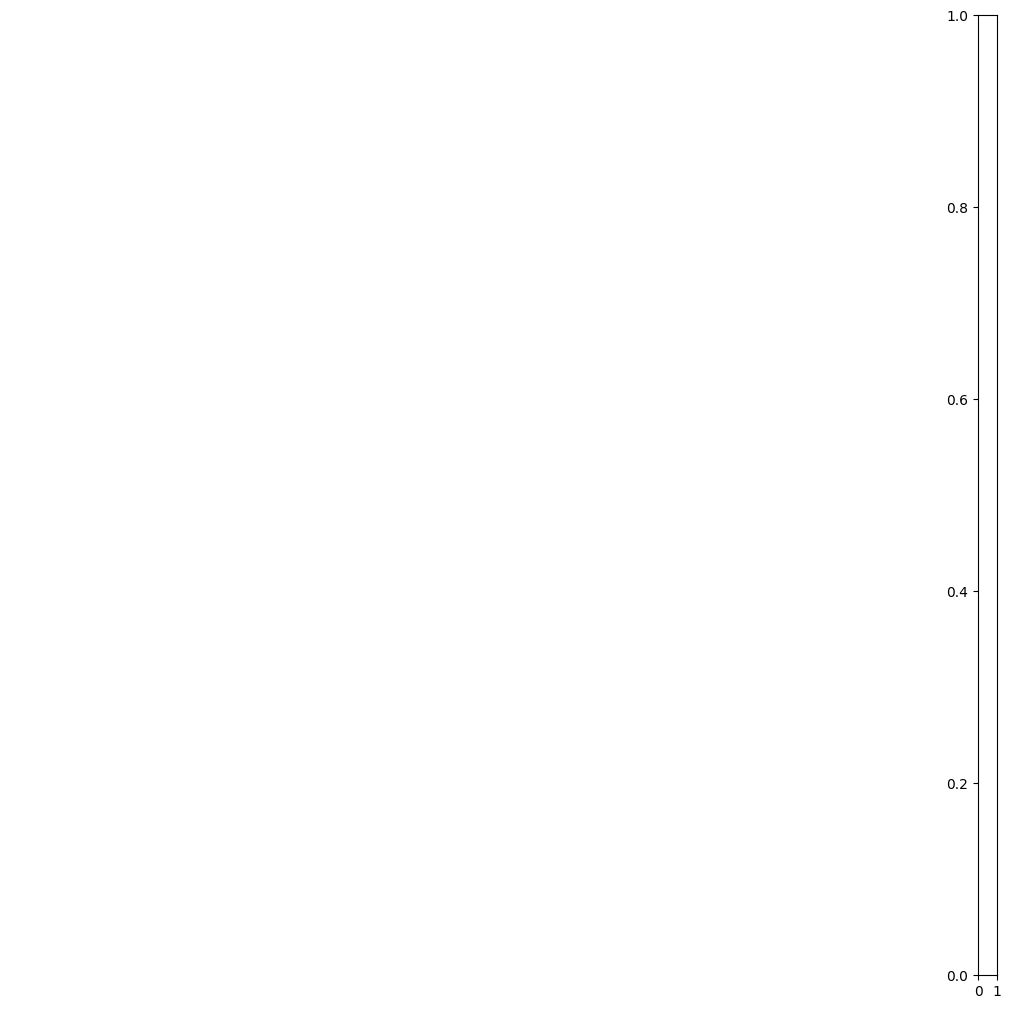

In [22]:
# purely an EXAMPLE taken from the provided code
# Example choropleth map showing 2022 population levels
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
mapdf.plot(ax=ax,column='Population2022',legend=True,cax=cax)

In [23]:
# Some of the simplest models possible:
# Every county votes for the same candidate as they did in 2020. This is especially relevant with impending Biden vs. Trump rematch
votevadf = votingdf[(votingdf['state_po']=='VA') & (votingdf['office']=='US PRESIDENT')]
voteva2020df = votevadf[votingdf['year']==2020]

max_candidatevotes = voteva2020df.groupby('county_name')['candidatevotes'].transform('max')
winning_rows = voteva2020df[voteva2020df['candidatevotes']==max_candidatevotes]
win2020_df = pd.DataFrame(winning_rows)
win2020_df.reset_index(drop=True, inplace=True)

In [24]:
win2020_df = win2020_df[win2020_df['mode']=='ELECTION DAY']
win2020_df = win2020_df[[]]
win2020_df

""
0
2
3
4
5
...
93
101
103
108


In [26]:
# partyvotevadf = voteva2020df[['year','county_name','county_fips','party']]

In [27]:
votingdf['totalvotes'].dtype

dtype('int64')

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

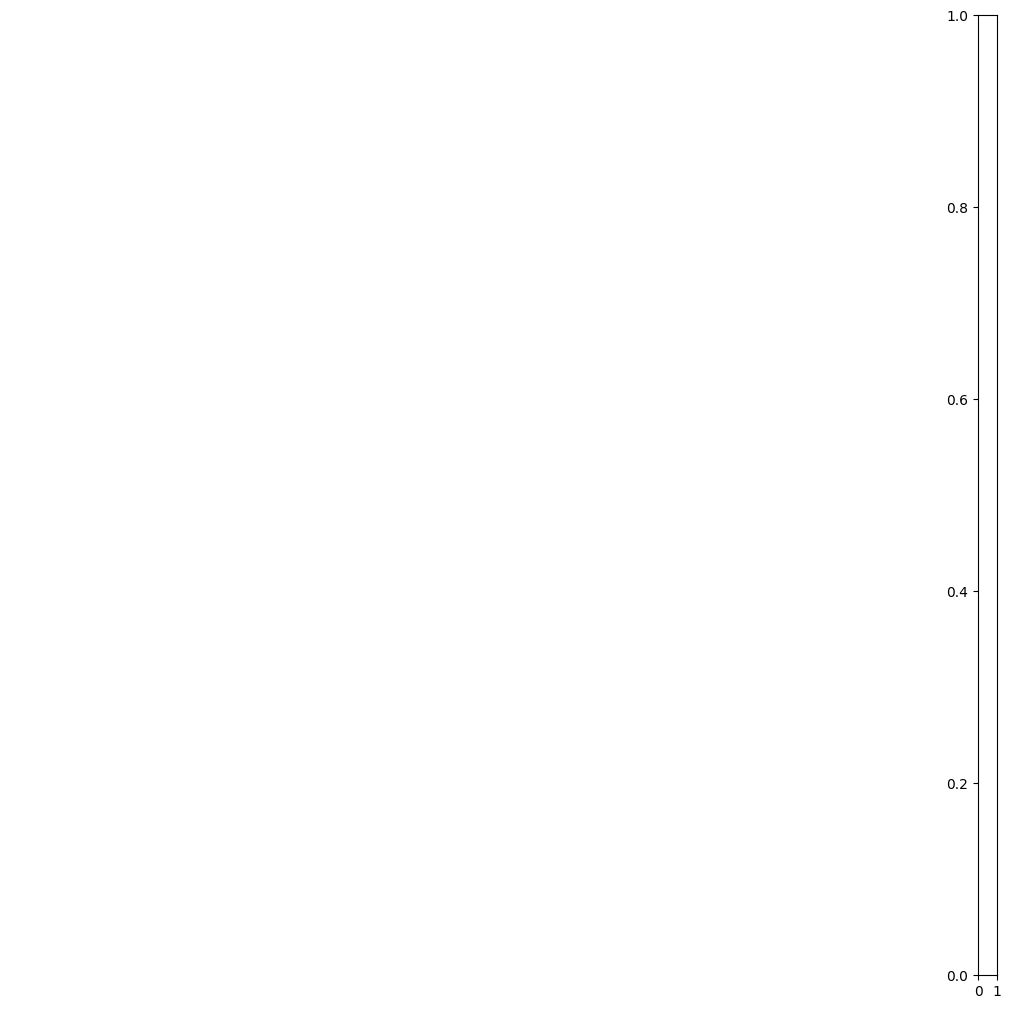

In [28]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
mapdf.plot(ax=ax,column='Population2022',legend=True,cax=cax)

In [ ]:
# Every county votes for the candidate from the party with the most votes from 2000-2020. If there is a tie, then the recent party holds tiebreaker.
votevadf

In [ ]:
# Populations above the VA mean size vote D; populations below the VA mean size vote R.

In [ ]:
# Populations majority female vote D; populations majority male vote R.

In [ ]:
# Populations majority non-white vote D; populations majority white vote R.

In [ ]:
# Populations majority associate's degree or below vote D; populations majority bachelor's degree or above vote R.

In [ ]:
# Populations above the VA median household income vote D; populations above the VA median household income vote R.

**Results**

**Conclusion**

**Appendix**